In [53]:
import xml.etree.ElementTree as ET

import plotly.express as px


def parse_xml_results(filepath):
    """
    Parse an XML file generated by Catch2 benchmark results.
    Extract the matrix sizes and corresponding mean execution times.
    Assumes times are originally in nanoseconds (ns).
    Converts ns to ms by dividing by 1e6.
    """
    tree = ET.parse(filepath)
    root = tree.getroot()

    sizes = []
    means_ms = []
    for benchmark in root.findall(".//BenchmarkResults"):
        name = benchmark.get("name")
        parts = name.split()
        size = int(parts[-1])

        mean_tag = benchmark.find("./mean")
        # Convert from ns to ms
        mean_value_ms = float(mean_tag.get("value")) / 1e6

        sizes.append(size)
        means_ms.append(mean_value_ms)

    return sizes, means_ms


# Parse the two XML files
rsvd_sizes, rsvd_means = parse_xml_results("results/rsvd.xml")
pm_sizes, pm_means = parse_xml_results("results/powermethod.xml")
bdcsvd_sizes, bdcsvd_means = parse_xml_results("results/bdcsvd.xml")

# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "Matrix Size", "y": "Mean Execution Time (ms)"},
)

# Add RSVD trace
fig.add_scatter(x=rsvd_sizes, y=rsvd_means, mode="lines+markers", name="RSVD")

# Add Power Method trace
fig.add_scatter(x=pm_sizes, y=pm_means, mode="lines+markers", name="Power Method SVD")

# Add BDCSVD trace
fig.add_scatter(x=bdcsvd_sizes, y=bdcsvd_means, mode="lines+markers", name="BDCSVD")

fig.update_layout(xaxis_title="Matrix Size", yaxis_title="Mean Execution Time (ms)")


fig.show()

# Save the figure as jpg
fig.write_image("figures/plot.jpg", scale=10, width=1000, height=600)

In [54]:
import plotly.express as px

# Parse the two XML files
householder_sizes, householder_means = parse_xml_results("results/householder.xml")
givens_sizes, givens_means = parse_xml_results("results/givens_rotation.xml")


# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "Matrix Size", "y": "Mean Execution Time (ms)"},
)

# Add householder trace
fig.add_scatter(
    x=householder_sizes, y=householder_means, mode="lines+markers", name="householder"
)

# Add Givens trace
fig.add_scatter(x=givens_sizes, y=givens_means, mode="lines+markers", name="Givens")

fig.update_layout(xaxis_title="Matrix Size", yaxis_title="Mean Execution Time (ms)")


fig.show()

# exprt fig to jpg
fig.write_image("figures/householder_givens.jpg", scale=10, width=1000, height=600)

In [55]:
import plotly.express as px

# Parse the two XML files
householder_sizes, householder_means = parse_xml_results("results/householder.xml")
givens_sizes, givens_means = parse_xml_results("results/givens_rotation.xml")


# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "Matrix Size", "y": "Mean Execution Time (ms)"},
)

# Add householder trace
fig.add_scatter(
    x=householder_sizes, y=householder_means, mode="lines+markers", name="householder"
)

# Add Givens trace
fig.add_scatter(x=givens_sizes, y=givens_means, mode="lines+markers", name="Givens")

fig.update_layout(xaxis_title="Matrix Size", yaxis_title="Mean Execution Time (ms)")


fig.show()

# exprt fig to jpg
fig.write_image("figures/householder_givens.jpg", scale=10, width=1000, height=600)

In [56]:
import time

import numpy as np


# Generate sparse matrices
def generate_sparse_matrices(start_size, end_size, step, sparsity):
    matrices = []
    for size in range(start_size, end_size + 1, step):
        matrix = np.random.rand(size, size)
        matrix[np.random.rand(*matrix.shape) > sparsity] = 0
        matrices.append(matrix)
    return matrices


# Benchmark NumPy
def benchmark_numpy(matrices):
    sizes = []
    times = []
    for matrix in matrices:
        start = time.perf_counter()
        np.linalg.qr(matrix)  # NumPy QR decomposition
        end = time.perf_counter()
        sizes.append(matrix.shape[0])
        times.append((end - start) * 1000)  # Time in ms
    return sizes, times


# Save results to XML
def save_results_to_xml(filename, sizes, times):
    root = ET.Element("BenchmarkResults")
    for size, time in zip(sizes, times):
        result = ET.SubElement(root, "Result")
        ET.SubElement(result, "MatrixSize").text = str(size)
        ET.SubElement(result, "MeanExecutionTime").text = f"{time:.2f}"
    tree = ET.ElementTree(root)
    tree.write(filename)


# Constants
start_size = 100
end_size = 1000
step_size = 100
sparsity = 0.1

# Generate matrices and benchmark
matrices = generate_sparse_matrices(start_size, end_size, step_size, sparsity)
numpy_sizes, numpy_means = benchmark_numpy(matrices)

In [57]:
import plotly.express as px

# Parse the two XML files
sparseqr_sizes, sparseqr_means = parse_xml_results("results/sparseqr.xml")
givens_sizes, givens_means = parse_xml_results("results/givens_rotation.xml")

# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "Matrix Size", "y": "Mean Execution Time (ms)"},
)

# Add householder trace
fig.add_scatter(
    x=sparseqr_sizes, y=sparseqr_means, mode="lines+markers", name="SparseQR"
)

# Add Givens trace
fig.add_scatter(x=givens_sizes, y=givens_means, mode="lines+markers", name="Givens")

# Add NumPy trace
fig.add_scatter(x=numpy_sizes, y=numpy_means, mode="lines+markers", name="NumPy")

fig.update_layout(
    xaxis_title="Matrix Size", yaxis_title="Mean Execution Time (ms)", showlegend=False
)


fig.show()

# exprt fig to jpg
fig.write_image("figures/sparseqr_givens.jpg", scale=5, width=500, height=300)

In [58]:
import plotly.express as px

# Parse the two XML files
sparseqr_sizes, sparseqr_means = parse_xml_results("results/sparseqr.xml")
givens_sizes, givens_means = parse_xml_results("results/givens_rotation.xml")
# Use SparseQR as the baseline for speedup calculation
baseline_means = sparseqr_means

# Calculate speedups
sparseqr_speedup = [b / m for b, m in zip(baseline_means, sparseqr_means)]
givens_speedup = [b / m for b, m in zip(baseline_means, givens_means)]
numpy_speedup = [b / m for b, m in zip(baseline_means, numpy_means)]

# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "Matrix Size", "y": "Speedup"},
)

# Add SparseQR trace (baseline will have a constant speedup of 1)
fig.add_scatter(
    x=sparseqr_sizes,
    y=sparseqr_speedup,
    mode="lines+markers",
    name="SparseQR (Baseline)",
)

# Add Givens trace
fig.add_scatter(x=givens_sizes, y=givens_speedup, mode="lines+markers", name="Givens")

# Add NumPy trace
fig.add_scatter(x=numpy_sizes, y=numpy_speedup, mode="lines+markers", name="NumPy")

# Update layout with axis titles
fig.update_layout(
    xaxis_title="Matrix Size",
    yaxis_title="Speedup (Relative to SparseQR)",
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/speedup_sparseqr_givens.jpg", scale=5, width=500, height=300)

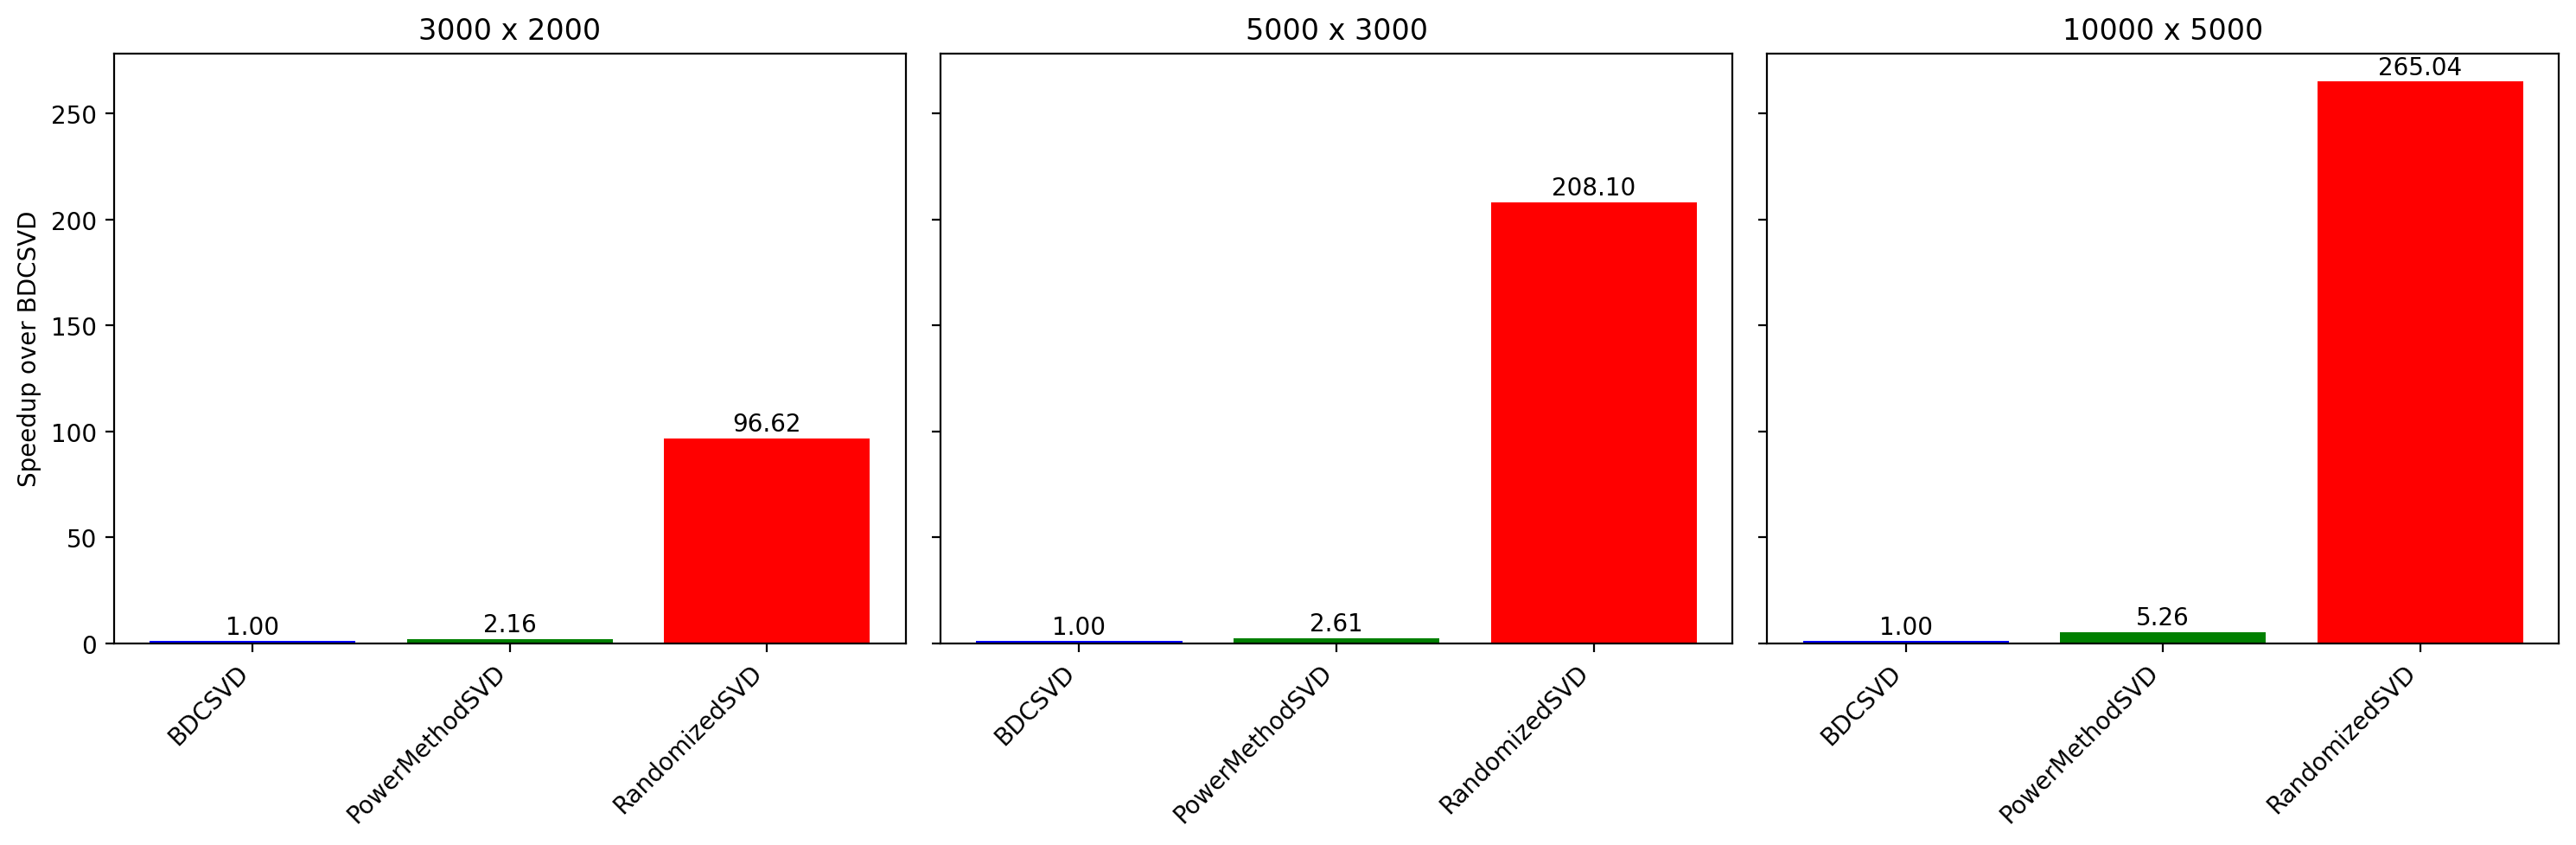

In [59]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
# Data for the plot
matrix_sizes = ["3000 x 2000", "5000 x 3000", "10000 x 5000"]
methods = ["BDCSVD", "PowerMethodSVD", "RandomizedSVD"]
speedups = {
    "3000 x 2000": [1, 2.15811, 96.6223],
    "5000 x 3000": [1, 2.60548, 208.096],
    "10000 x 5000": [1, 5.26358, 265.043],
}

# Define colors for each method
colors = ["blue", "green", "red"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, matrix_size in enumerate(matrix_sizes):
    ax = axes[idx]

    # Extract data
    y_values = speedups[matrix_size]
    x_positions = np.arange(len(methods))

    # Plot bars
    bars = ax.bar(x_positions, y_values, color=colors, tick_label=methods)
    ax.set_title(matrix_size)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(methods, rotation=45, ha="right")

    # Add numbers below the bars
    for bar, y_value in zip(bars, y_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f"{y_value:.2f}",
            ha="center",
            va="bottom",
        )

    # Add y-axis label for the first subplot
    if idx == 0:
        ax.set_ylabel("Speedup over BDCSVD")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("results/svd_results.csv")

methods = df["Method"].unique()

# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "Speedup"},
)

custom_legend_names = {
    "BDCSVD": "SVD",
    "PowerMethodSVD": "Power Iteration SVD",
    "RandomizedSVD_Iter1": "RSVD (p=1)",
    "RandomizedSVD_Iter2": "RSVD (p=2)",
}


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["Speedup"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )

# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Speedup",
    showlegend=False,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_speedup.pdf", scale=5, width=500, height=300)

In [23]:
# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "Time(s)"},
)


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["Time(s)"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )
# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Elapsed Time (s)",
    showlegend=False,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_time.pdf", scale=5, width=500, height=300)

In [24]:
# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "RelativeFroError"},
)


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["RelativeFroError"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )
# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    yaxis=dict(
        type="log",
        tickmode="array",
        tickvals=[1e00, 1e-04, 1e-08, 1e-12, 1e-16],
        ticktext=["1e+00", "1e-04", "1e-08", "1e-12", "1e-16"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Relative Error",
    showlegend=True,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_error.pdf", scale=5, width=500, height=300)

## Sparse SVD


In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("results/svd_results_sparse.csv")

methods = df["Method"].unique()

# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "Speedup"},
)

custom_legend_names = {
    "BDCSVD": "SVD",
    "PowerMethodSVD": "Power Iteration SVD",
    "RandomizedSVD_Iter1": "RSVD (p=1)",
    "RandomizedSVD_Iter2": "RSVD (p=2)",
}


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["Speedup"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )

# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Speedup",
    showlegend=False,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_speedup_sparse.pdf", scale=5, width=500, height=300)

In [2]:
# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "Time(s)"},
)


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["Time(s)"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )
# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Elapsed Time (s)",
    showlegend=False,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_time_sparse.pdf", scale=5, width=500, height=300)

In [3]:
# Create a Plotly figure with both lines
fig = px.line(
    labels={"x": "k", "y": "RelativeFroError"},
)


for method in methods:
    method_df = df[df["Method"] == method]
    speedup = method_df["RelativeFroError"].values
    matrix_size = method_df["k"].values
    fig.add_scatter(
        x=matrix_size,
        y=speedup,
        mode="lines+markers",
        name=custom_legend_names.get(method, method),
    )
# Update layout with axis titles
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[5, 20, 50, 100, 200],
        ticktext=["5", "20", "50", "100", "200"],
    ),
    yaxis=dict(
        type="log",
        tickmode="array",
        tickvals=[1e00, 1e-04, 1e-08, 1e-12, 1e-16],
        ticktext=["1e+00", "1e-04", "1e-08", "1e-12", "1e-16"],
    ),
    xaxis_title="Target-rank, k",
    yaxis_title="Relative Error",
    showlegend=True,
)

# Show the figure
fig.show()

# Export the figure to a JPG file
fig.write_image("figures/svd_error_sparse.pdf", scale=5, width=500, height=300)